# **Designing a Student Success Prediction Model:** Harnessing the Power of Behavioral Data

## **Overview**

This notebook demonstrates a complete machine learning workflow aimed at predicting early **student success** in an online education program. The goal is to use onboarding assessment and early participation data from the first 30 days to identify which students are likely to succeed — and which ones may need early intervention.

---

## **What's Inside**

- **Data Simulation & Preparation**  
  A synthetic dataset of 50 students, including onboarding scores, class attendance, homework submission rates, platform usage, and participation scores.

- **Data Cleaning & Imputation**  
  Missing values are identified and filled using **linear regression-based imputation**, ensuring data quality while retaining trends and relationships.

- **Clustering & Behavioral Insights**  
  Using **KMeans clustering** and **PCA**, students are grouped into 3 distinct behavioral personas:
  - **High Achieving Learners**
  - **Average Learners**
  - **Struggling Learners** <br>  


- **Exploratory Visualization**  
  Engagement metrics are visualized to highlight differences between behavioral groups.

- **Predictive Modeling**  
  Built a **Logistic Regression** classification algorithm to predict student success based on early behavioral and performance data.

- **LLM Integration**

  This LLM integration bridges the gap between raw predictive outputs and practical decision-making:

  Interpretability: The LLM translates numerical predictions into meaningful narratives.
  Personalization: Recommendations are customized based on individual student data and behavioral personas.
  Efficiency: Educators receive instant, detailed feedback without needing to manually analyze model results.

## **Business Use Case**

By predicting student success early, education teams can:
- Design **targeted interventions** for at-risk learners
- Reduce Student Churn
- Improve overall student engagement and outcomes
- Allocate tutoring resources more effectively

---

> This is a demonstration of how machine learning, behavioral segmentation, and generative AI can work together to turn behavioral and performance data into **actionable insights**.


### See the model in action: [Click here to visit the Demo Site](https://alanbjordan.github.io/StudentSuccessPredictor/)

### Setting up the Project

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Load the rough CSV file
df = pd.read_csv('student_data_set.csv')

### Exploratory Analysis

In [3]:
# Display the first few rows to see the data structure
print("First 5 rows of the dataset:")
display(df.head())

# Check the data types and non-null counts
print("\nDataFrame Info:")
print(df.info())

# Check for missing values in each column
print("\nMissing values in each column:")
display(df.isnull().sum())

# Display summary statistics to check for irregularities in numeric data
print("\nSummary Statistics:")
display(df.describe())

First 5 rows of the dataset:


,StudentID,Age,OnboardingTestScore,ClassesAttended,HomeworkSubmissionRate,HoursOnPlatform,ParticipationScore,Success,Set
0,S001,22,85.0,15.0,90.0,40.0,8.0,1,Train
1,S002,19,60.0,10.0,70.0,25.0,5.0,0,Train
2,S003,24,75.0,12.0,NaN,30.0,7.0,1,Train
3,S004,21,55.0,8.0,60.0,20.0,4.0,0,Train
4,S005,23,90.0,18.0,95.0,45.0,9.0,1,Train



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StudentID               50 non-null     object 
 1   Age                     50 non-null     int64  
 2   OnboardingTestScore     49 non-null     float64
 3   ClassesAttended         48 non-null     float64
 4   HomeworkSubmissionRate  49 non-null     float64
 5   HoursOnPlatform         48 non-null     float64
 6   ParticipationScore      49 non-null     float64
 7   Success                 50 non-null     int64  
 8   Set                     50 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ KB
None

Missing values in each column:


StudentID                 0
Age                       0
OnboardingTestScore       1
ClassesAttended           2
HomeworkSubmissionRate    1
HoursOnPlatform           2
ParticipationScore        1
Success                   0
Set                       0
dtype: int64


Summary Statistics:


,Age,OnboardingTestScore,ClassesAttended,HomeworkSubmissionRate,HoursOnPlatform,ParticipationScore,Success
count,50.000000,49.000000,48.000000,49.000000,48.000000,49.000000,50.000000
mean,21.500000,74.061224,12.437500,78.020408,31.187500,6.367347,0.540000
std,1.897904,11.794081,3.208408,11.457330,7.977778,1.856227,0.503457
min,18.000000,50.000000,7.000000,55.000000,18.000000,3.000000,0.000000
25%,20.000000,65.000000,10.000000,69.000000,24.750000,5.000000,0.000000
50%,21.500000,75.000000,12.500000,79.000000,30.500000,7.000000,1.000000
75%,23.000000,84.000000,15.000000,88.000000,37.250000,8.000000,1.000000
max,25.000000,95.000000,18.000000,98.000000,47.000000,10.000000,1.000000


### Additional Inspection

In [4]:
# Inspect unique values for columns that might contain irregularities (like extra spaces)
print("\nUnique values in the 'Success' column:")
print(df['Success'].unique())


Unique values in the 'Success' column:
[1 0]


### Process Data

In [5]:
# Convert columns to numeric where appropriate
numeric_cols = ['Age', 'OnboardingTestScore', 'ClassesAttended', 
                'HomeworkSubmissionRate', 'HoursOnPlatform', 'ParticipationScore']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Check for any remaining missing values
print(df.isnull().sum())


StudentID                 0
Age                       0
OnboardingTestScore       1
ClassesAttended           2
HomeworkSubmissionRate    1
HoursOnPlatform           2
ParticipationScore        1
Success                   0
Set                       0
dtype: int64


### View Data Distribution

<Figure size 1500x1000 with 0 Axes>

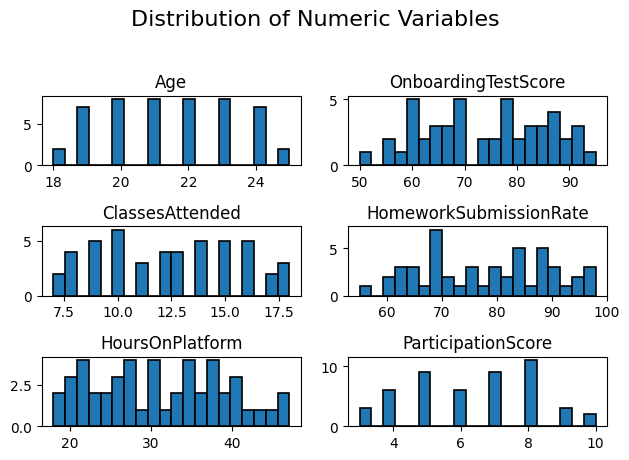

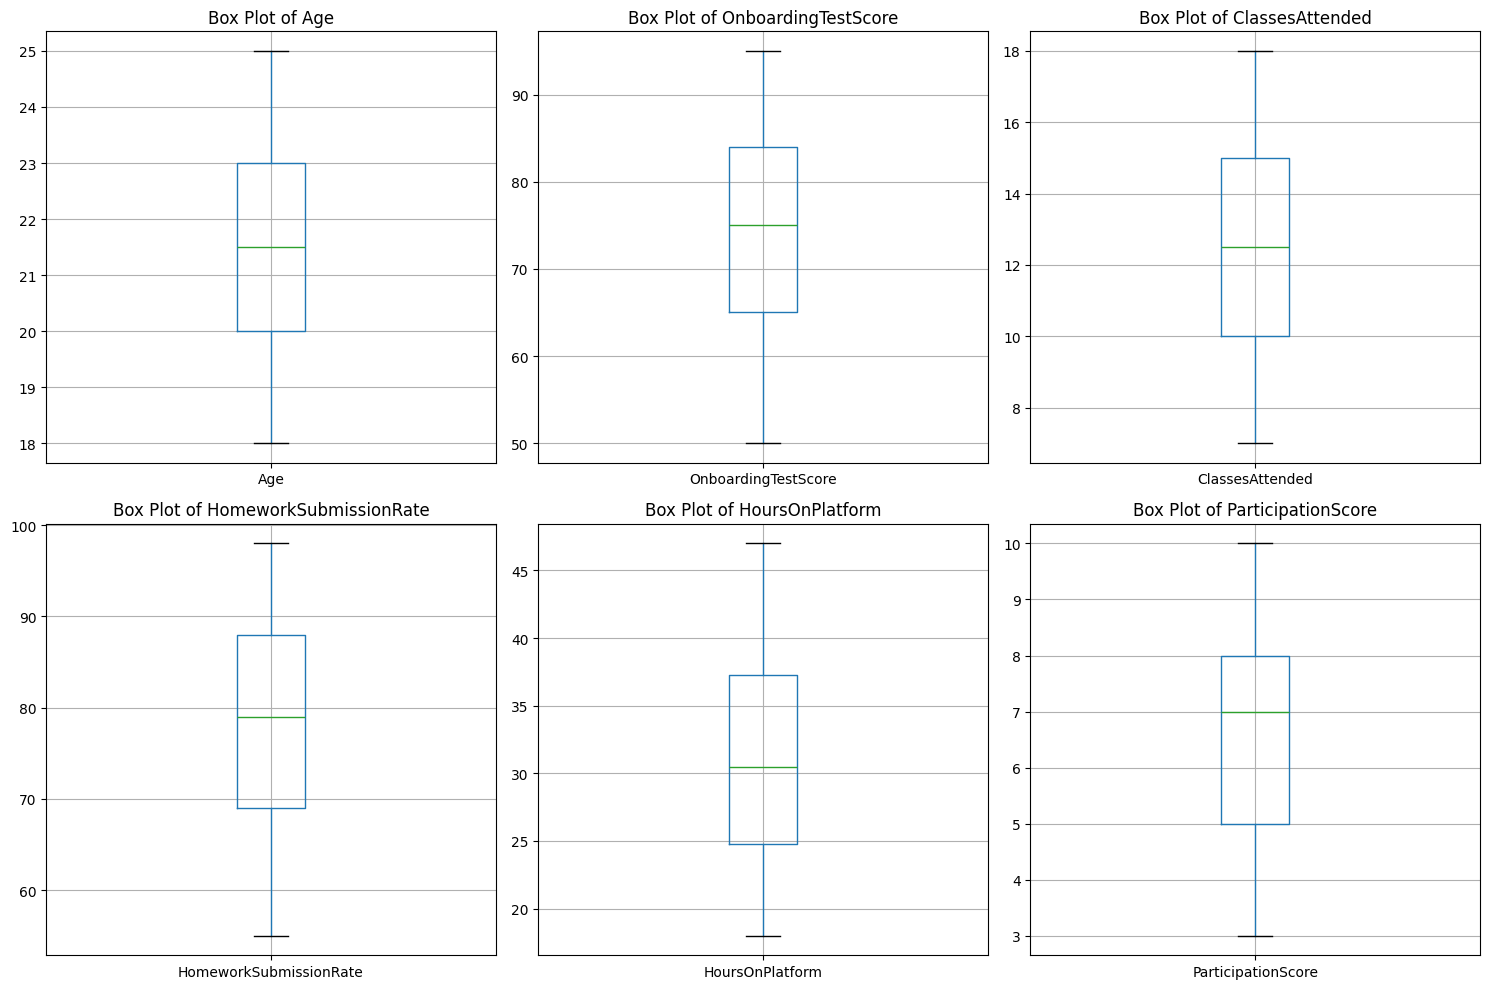

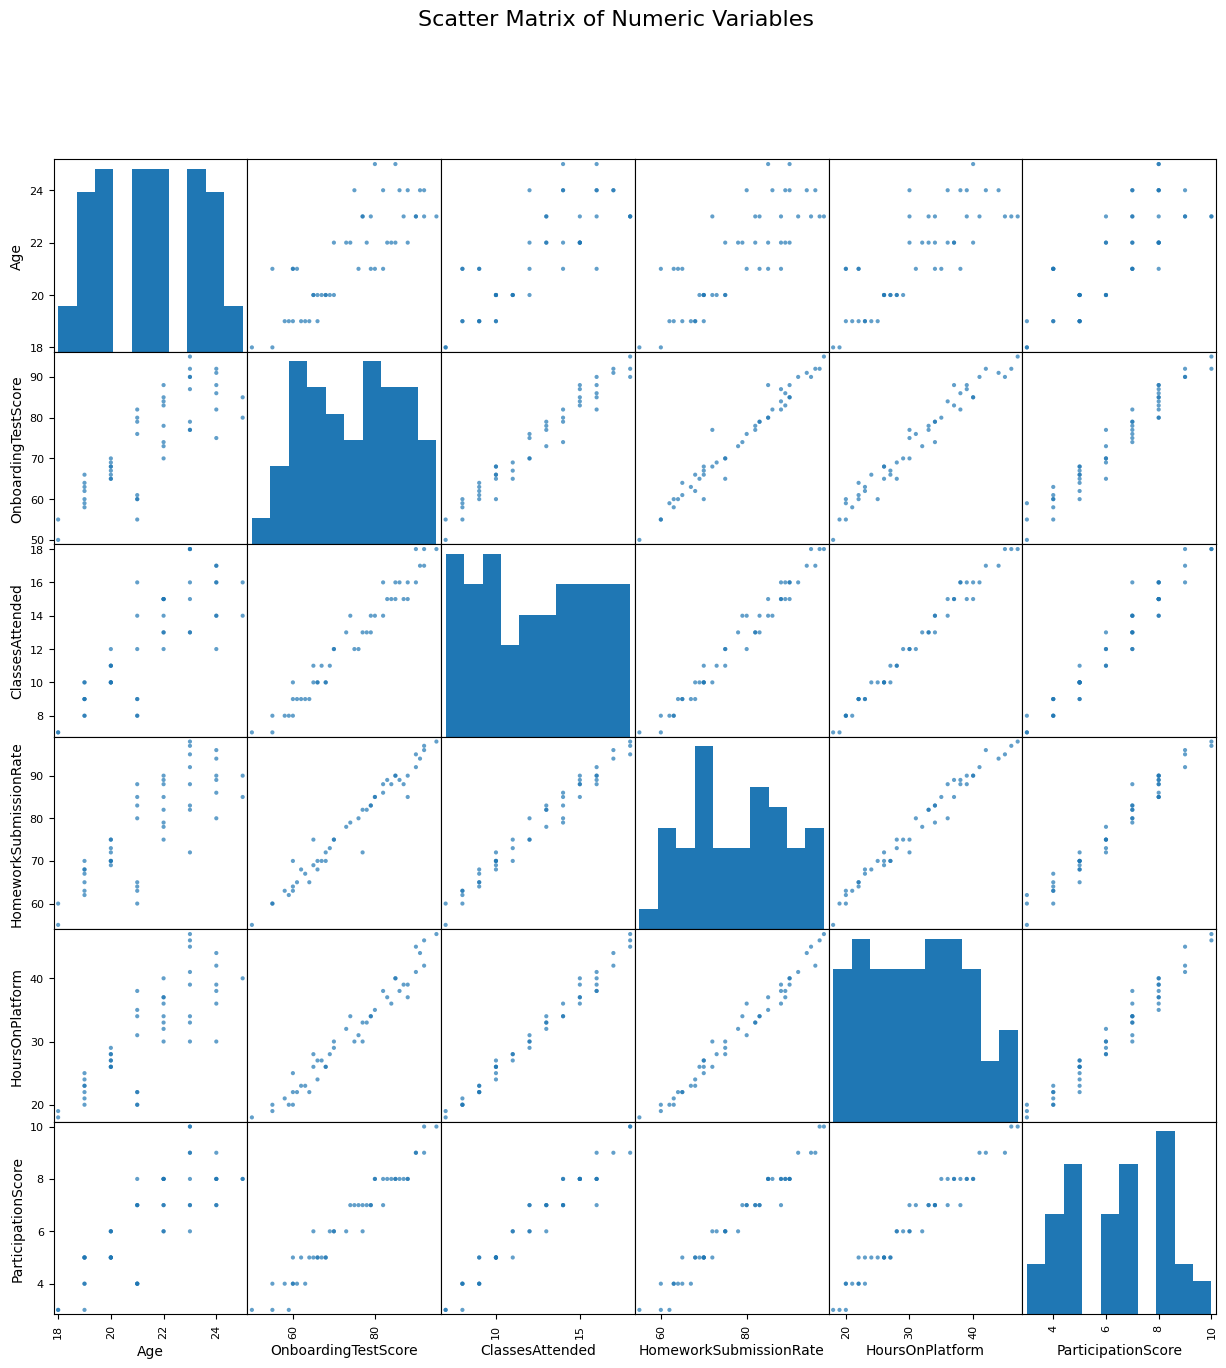

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is loaded as df and numeric columns have been converted.

numeric_cols = ['Age', 'OnboardingTestScore', 'ClassesAttended', 
                'HomeworkSubmissionRate', 'HoursOnPlatform', 'ParticipationScore']

# 1. Histograms
plt.figure(figsize=(15, 10))
df[numeric_cols].hist(bins=20, grid=False, edgecolor='black', linewidth=1.2)
plt.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Box Plots for spotting outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    df.boxplot(column=col)
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

# 3. Scatter Matrix for pairwise relationship (using Pandas' inbuilt plotting function)
pd.plotting.scatter_matrix(df[numeric_cols], figsize=(15, 15), diagonal='hist', alpha=0.7)
plt.suptitle("Scatter Matrix of Numeric Variables", fontsize=16)
plt.show()


### Impute Missing Continuous Data with Linear Regression


Summary Statistics before imputation:


,Age,OnboardingTestScore,ClassesAttended,HomeworkSubmissionRate,HoursOnPlatform,ParticipationScore,Success
count,50.000000,49.000000,48.000000,49.000000,48.000000,49.000000,50.000000
mean,21.500000,74.061224,12.437500,78.020408,31.187500,6.367347,0.540000
std,1.897904,11.794081,3.208408,11.457330,7.977778,1.856227,0.503457
min,18.000000,50.000000,7.000000,55.000000,18.000000,3.000000,0.000000
25%,20.000000,65.000000,10.000000,69.000000,24.750000,5.000000,0.000000
50%,21.500000,75.000000,12.500000,79.000000,30.500000,7.000000,1.000000
75%,23.000000,84.000000,15.000000,88.000000,37.250000,8.000000,1.000000
max,25.000000,95.000000,18.000000,98.000000,47.000000,10.000000,1.000000



Missing values for OnboardingTestScore before imputation: 1
Imputed missing values for OnboardingTestScore using linear regression (n=1).
Missing values for OnboardingTestScore after imputation: 0


/home/jsnow/miniconda3/envs/NER/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


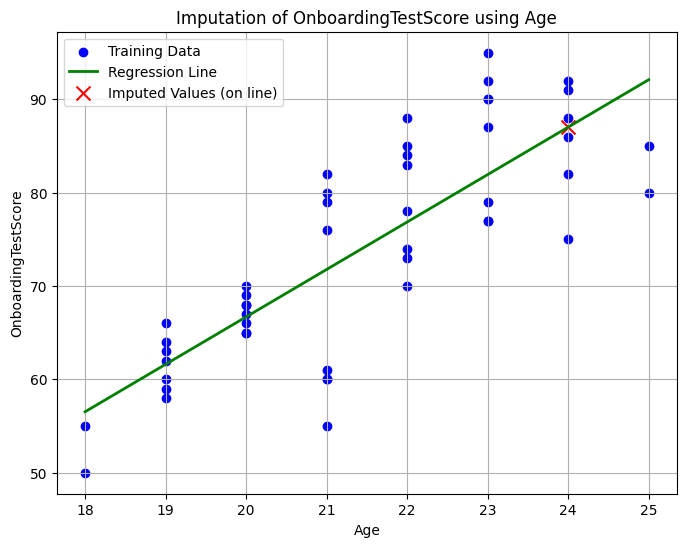


Missing values for HomeworkSubmissionRate before imputation: 1
Imputed missing values for HomeworkSubmissionRate using linear regression (n=1).
Missing values for HomeworkSubmissionRate after imputation: 0


/home/jsnow/miniconda3/envs/NER/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


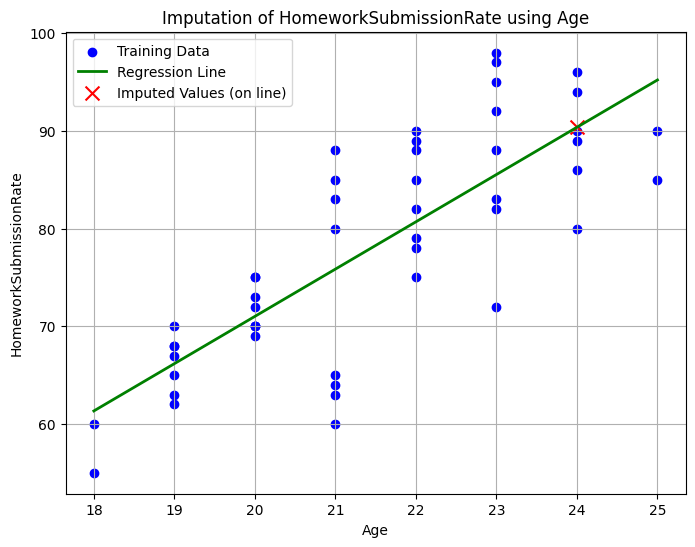


Missing values for ClassesAttended before imputation: 2
Imputed missing values for ClassesAttended using linear regression (n=2).
Missing values for ClassesAttended after imputation: 0


/home/jsnow/miniconda3/envs/NER/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


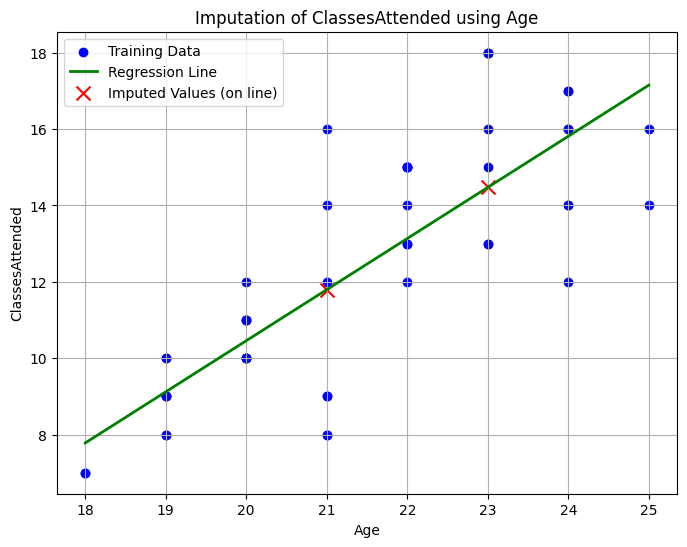


Missing values for HoursOnPlatform before imputation: 2
Imputed missing values for HoursOnPlatform using linear regression (n=2).
Missing values for HoursOnPlatform after imputation: 0


/home/jsnow/miniconda3/envs/NER/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


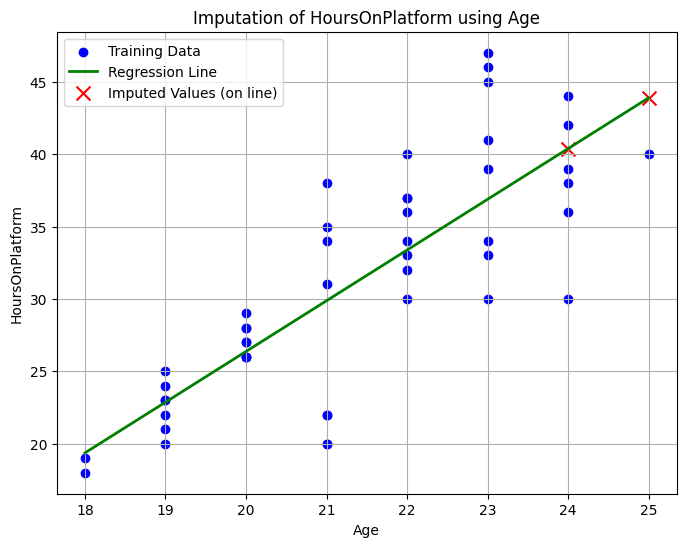


Missing values for ParticipationScore before imputation: 1
Imputed missing values for ParticipationScore using linear regression (n=1).
Missing values for ParticipationScore after imputation: 0


/home/jsnow/miniconda3/envs/NER/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


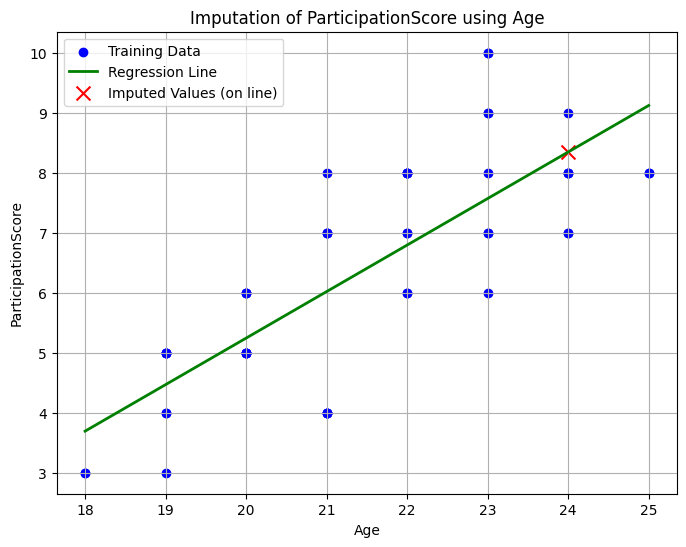


Summary Statistics after imputation:


,Age,OnboardingTestScore,ClassesAttended,HomeworkSubmissionRate,HoursOnPlatform,ParticipationScore,Success
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,21.500000,74.134902,12.454995,78.016499,31.373255,6.423832,0.540000
std,1.897904,11.684733,3.150499,11.339849,7.867190,1.880104,0.503457
min,18.000000,50.000000,7.000000,55.000000,18.000000,3.000000,0.000000
25%,20.000000,65.000000,10.000000,69.250000,25.250000,5.000000,0.000000
50%,21.500000,75.500000,12.500000,78.500000,31.500000,7.000000,1.000000
75%,23.000000,83.750000,15.000000,88.000000,37.000000,8.000000,1.000000
max,25.000000,95.000000,18.000000,98.000000,47.000000,10.000000,1.000000


  StudentID  Age  OnboardingTestScore  ClassesAttended  \
0      S001   22                 85.0             15.0   
1      S002   19                 60.0             10.0   
2      S003   24                 75.0             12.0   
3      S004   21                 55.0              8.0   
4      S005   23                 90.0             18.0   
5      S006   20                 65.0             11.0   
6      S007   25                 80.0             14.0   
7      S008   18                 50.0              7.0   
8      S009   22                 78.0             13.0   
9      S010   20                 68.0             10.0   

   HomeworkSubmissionRate  HoursOnPlatform  ParticipationScore  Success    Set  
0               90.000000        40.000000                 8.0        1  Train  
1               70.000000        25.000000                 5.0        0  Train  
2               77.824929        30.000000                 7.0        1  Train  
3               60.000000        20.0

StudentID                 0
Age                       0
OnboardingTestScore       0
ClassesAttended           0
HomeworkSubmissionRate    0
HoursOnPlatform           0
ParticipationScore        0
Success                   0
Set                       0
dtype: int64

In [40]:
# Function to perform linear regression imputation on a single column
def impute_with_linear_regression(df, target):
    # Use all other numeric columns as features for prediction
    predictors = [col for col in numeric_cols if col != target]
    
    # Get rows where target is not missing and predictors are complete
    train_df = df[df[target].notnull() & df[predictors].notnull().all(axis=1)]
    
    # Get rows where target is missing and predictors are complete
    test_df = df[df[target].isnull() & df[predictors].notnull().all(axis=1)]
    
    if test_df.empty:
        print(f"No missing values to impute for {target}.")
        return df, None  # Return None for imputed indices
    
    # Prepare training data
    X_train = train_df[predictors]
    y_train = train_df[target]
    
    # Train the linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Prepare test data and predict missing values
    X_test = test_df[predictors]
    y_pred = lr.predict(X_test)
    
    # Impute the predicted values into the original DataFrame
    df.loc[test_df.index, target] = y_pred
    print(f"Imputed missing values for {target} using linear regression (n={len(test_df)}).")
    
    # Return the updated DataFrame and the indices of imputed rows
    return df, test_df.index

# List the target columns we want to impute 
columns_to_impute = ["OnboardingTestScore", "HomeworkSubmissionRate", "ClassesAttended", 
                     "HoursOnPlatform", "ParticipationScore"]

print("\nSummary Statistics before imputation:")
display(df.describe())

# Loop over each target column, store the missing mask for later visualization, impute, and plot.
for col in columns_to_impute:
    # Store mask of missing values BEFORE imputation
    missing_mask = df[col].isnull()
    missing_before = missing_mask.sum()
    print(f"\nMissing values for {col} before imputation: {missing_before}")
    
    # Impute the target column and capture the indices that were imputed
    df, imputed_indices = impute_with_linear_regression(df, col)
    missing_after = df[col].isnull().sum()
    print(f"Missing values for {col} after imputation: {missing_after}")
    
    # If there were imputed values, plot the results using univariate regression for clarity
    if missing_before > 0 and imputed_indices is not None:
        predictors = [p for p in numeric_cols if p != col]
        primary_predictor = predictors[0]
        
        # Create a new simple regression model for visualization
        train_data = df[~missing_mask]
        imputed_data = df.loc[imputed_indices]
        
        X_vis = train_data[[primary_predictor]]
        y_vis = train_data[col]
        lr_vis = LinearRegression()
        lr_vis.fit(X_vis, y_vis)

        # Predict values for imputed rows using the same regression line
        X_imputed = imputed_data[[primary_predictor]]
        y_imputed_pred = lr_vis.predict(X_imputed)

        # Generate regression line
        x_line = np.linspace(X_vis[primary_predictor].min(), X_vis[primary_predictor].max(), 100).reshape(-1, 1)
        y_line = lr_vis.predict(x_line)

        # Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(X_vis, y_vis, color='blue', label='Training Data')
        plt.plot(x_line, y_line, color='green', linewidth=2, label='Regression Line')
        plt.scatter(X_imputed, y_imputed_pred, color='red', marker='x', s=100, label='Imputed Values (on line)')
        plt.xlabel(primary_predictor)
        plt.ylabel(col)
        plt.title(f"Imputation of {col} using {primary_predictor}")
        plt.legend()
        plt.grid(True)
        plt.show()

# Drop any remaining rows with missing values
df.dropna(inplace=True)
# Check for any remaining missing values
print("\nSummary Statistics after imputation:")
display(df.describe())
print(df.head(10))
display(df.isnull().sum())

### Training KMeans Clustering Model for Behavioral Segmentation

k=1, Inertia=250.00
k=2, Inertia=65.54
k=3, Inertia=35.17
k=4, Inertia=24.26
k=5, Inertia=14.19
k=6, Inertia=10.77
k=7, Inertia=9.88
k=8, Inertia=8.46
k=9, Inertia=8.11
k=10, Inertia=7.83


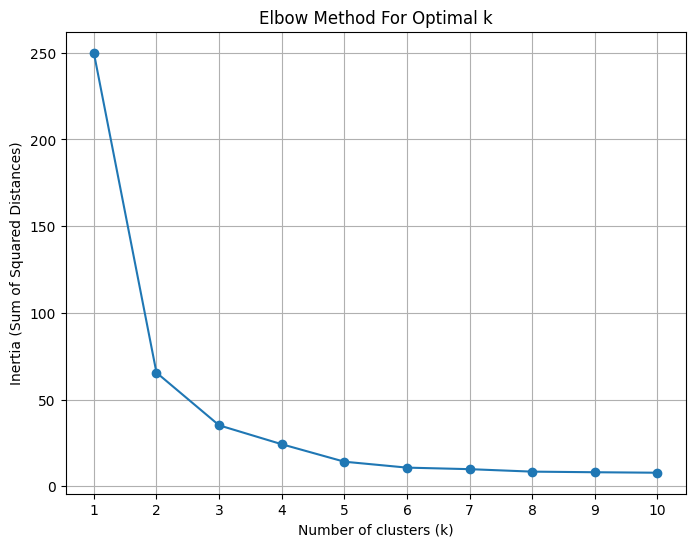

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select features for clustering
cluster_features = ['OnboardingTestScore', 'ClassesAttended', 
                    'HomeworkSubmissionRate', 'HoursOnPlatform', 'ParticipationScore']
X = df[cluster_features]

# Step 2: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute inertia for a range of k values to find the optimal number of clusters
inertias = []
k_range = range(1, 11)  # testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"k={k}, Inertia={kmeans.inertia_:.2f}")

# Step 4: Plot the "elbow" chart
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()






In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# K=3 is appropriate
k_optimal = 3

# Step 1: Select features for clustering
cluster_features = ['OnboardingTestScore', 'ClassesAttended', 
                    'HomeworkSubmissionRate', 'HoursOnPlatform', 'ParticipationScore']
X = df[cluster_features]

# Step 2: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Run KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Preview how many students per cluster
print("Cluster distribution:")
print(df['Cluster'].value_counts())


Cluster distribution:
Cluster
1    18
0    18
2    14
Name: count, dtype: int64


### Reducing Data from 5D to 2D and Visualizing Behavioral Clusters

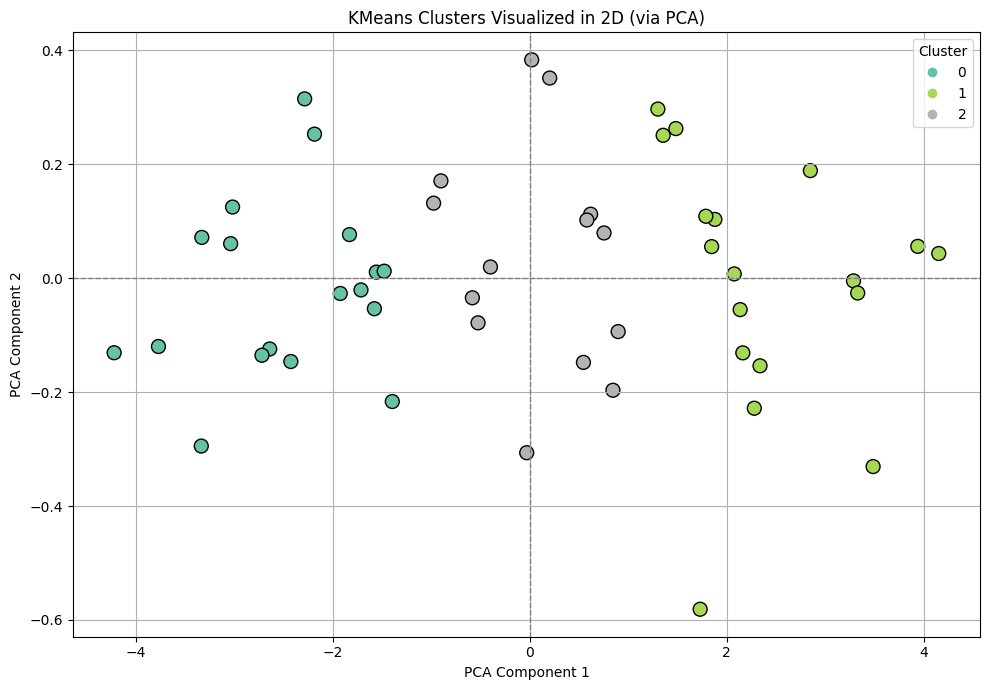

In [43]:
from sklearn.decomposition import PCA

# Reduce scaled data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame for plotting
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters as a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='Set2', s=100, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters Visualized in 2D (via PCA)")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()


### Analyzing and Labeling the Clusters

In [44]:
# Cluster summary
cluster_summary = df.groupby('Cluster')[cluster_features].mean()
display(cluster_summary)

# Define cluster labels for readability
cluster_name_map = {
    0: "Struggling Learners",
    2: "Average Learners",
    1: "High Achieving Learners"
}

# Create a new column with the readable names
df['ClusterLabel'] = df['Cluster'].map(cluster_name_map)

# Create a clean version of the dataset for future use
df_clusters_named = df.copy()

# Preview the new DataFrame
print("Data with readable cluster labels:")
print(df_clusters_named[['StudentID', 'Cluster', 'ClusterLabel']].head(10))

print("\nCluster Distribution:")
print(df_clusters_named['ClusterLabel'].value_counts())



,OnboardingTestScore,ClassesAttended,HomeworkSubmissionRate,HoursOnPlatform,ParticipationScore
Cluster,,,,,
0,61.500000,9.000000,65.611111,22.833333,4.333333
1,86.666667,15.828784,90.277778,39.759042,8.399534
2,74.267509,12.559402,78.201781,31.571429,6.571429


Data with readable cluster labels:
  StudentID  Cluster             ClusterLabel
0      S001        1  High Achieving Learners
1      S002        0      Struggling Learners
2      S003        2         Average Learners
3      S004        0      Struggling Learners
4      S005        1  High Achieving Learners
5      S006        2         Average Learners
6      S007        1  High Achieving Learners
7      S008        0      Struggling Learners
8      S009        2         Average Learners
9      S010        0      Struggling Learners

Cluster Distribution:
ClusterLabel
High Achieving Learners    18
Struggling Learners        18
Average Learners           14
Name: count, dtype: int64


###  Visualizating the Labeled Cluster Data

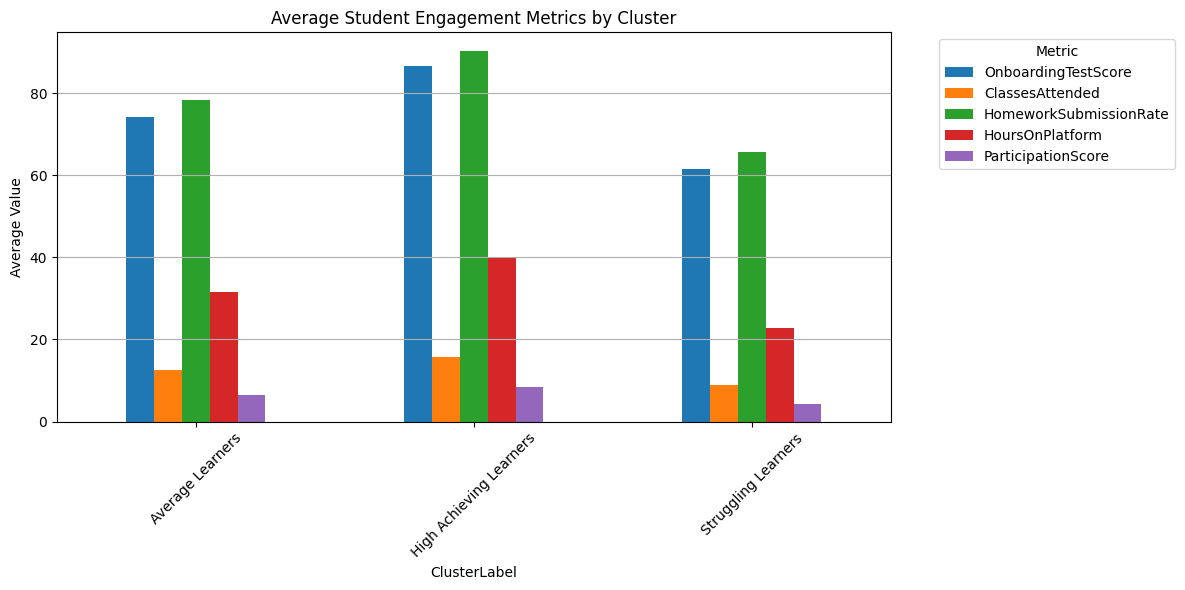

In [45]:
# Group by ClusterLabel and compute the mean of each feature
cluster_means = df_clusters_named.groupby('ClusterLabel')[[
    'OnboardingTestScore', 'ClassesAttended', 'HomeworkSubmissionRate',
    'HoursOnPlatform', 'ParticipationScore'
]].mean().sort_index()

# Bar chart for each metric
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Average Student Engagement Metrics by Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Building a Logistic Regression Model to Predict Student Success

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Define features and target
features = ['OnboardingTestScore', 'ClassesAttended', 'HomeworkSubmissionRate',
            'HoursOnPlatform', 'ParticipationScore', 'Cluster']  # using numeric Cluster

X = df_clusters_named[features]
y = df_clusters_named['Success'].astype(int)  

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the model (Logistic Regression first)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = logreg.predict(X_test)


### Evaluating and Explaining the Model

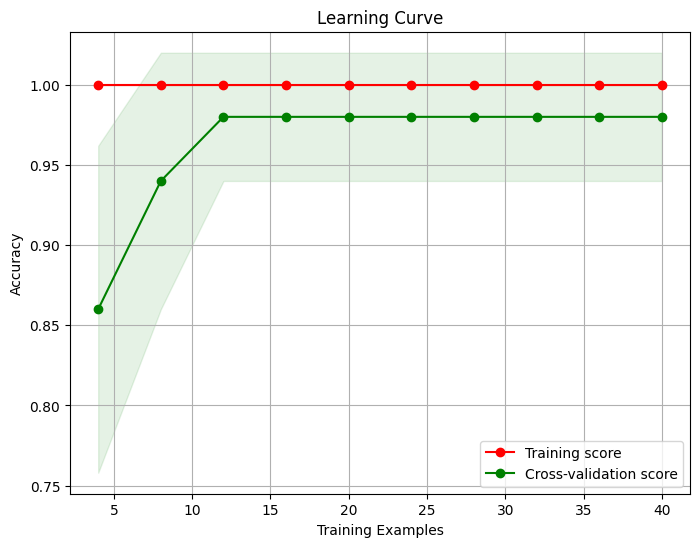

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the range for the training sizes
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logreg,      # Your trained logistic regression model
    X=X,                   # Full feature set
    y=y,                   # Full target
    cv=5,                  # 5-fold cross-validation
    train_sizes=np.linspace(0.1, 1.0, 10),  # Use 10 evenly spaced training sizes
    scoring='accuracy',    # You can change scoring if needed (e.g., 'f1')
    n_jobs=-1
)

# Calculate mean and standard deviation for both training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="g", alpha=0.1)
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


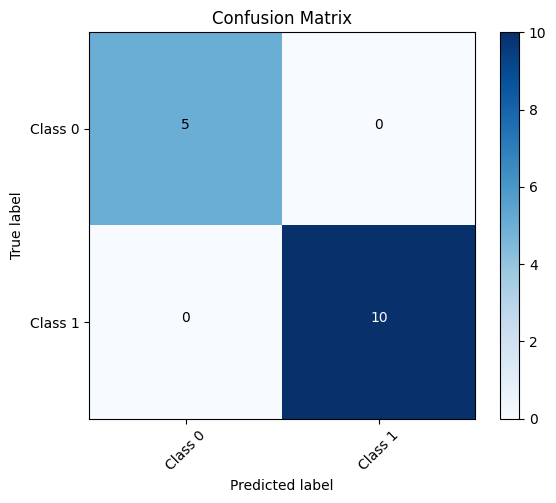

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Class 0', 'Class 1']  # Adjust these labels based on your context

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate each cell in the confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()


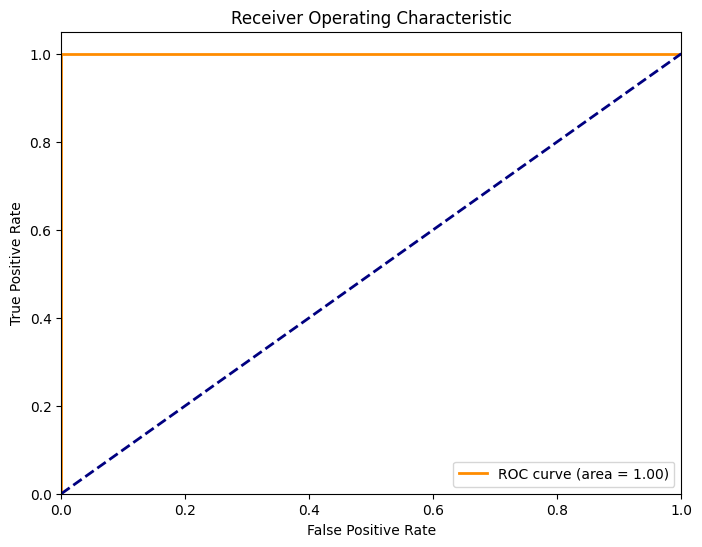

In [49]:
from sklearn.metrics import roc_curve, auc

y_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [50]:
# Step 5: Evaluate the model
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Training features
feature_names = X_train.columns

# Get coefficients
coefficients = logreg.coef_[0]  
intercept = logreg.intercept_[0]

# Create a DataFrame to display them neatly
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Explain the model
print(f"Intercept (bias): {intercept:.4f}\n")
print("Logistic Regression Coefficients:")
print(coef_df)


Logistic Regression Performance:
[[ 5  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Intercept (bias): -100.9350

Logistic Regression Coefficients:
                  Feature  Coefficient
2  HomeworkSubmissionRate     0.860478
3         HoursOnPlatform     0.348753
0     OnboardingTestScore     0.307703
1         ClassesAttended     0.145146
4      ParticipationScore     0.117892
5                 Cluster     0.003246


# **Review**

The logistic regression model demonstrate impeccable performance on the updated dataset, achieving a perfect 100% accuracy on a hold-out set of 15 observations. The table below summarizes the updated performance metrics and the insights drawn from the revised model parameters.

---

### Model Performance Overview

- **Confusion Matrix:**  
  The confusion matrix is given as:

  ```
  [[ 5  0]
   [ 0 10]]
  ```

  This matrix indicates that all 5 negative cases (class 0) and all 10 positive cases (class 1) were correctly classified, with no false positives or false negatives. Such a perfect score reflects the model's excellent discriminative power on this dataset.

- **Classification Report:**  
  - **Precision:** Both classes achieved a precision of 1.00, meaning every prediction made by the model was correct.  
  - **Recall:** Recall values of 1.00 for both classes indicate that the model successfully identified all instances in each class.  
  - **F1-Score:** With F1-scores of 1.00, the harmonic balance between precision and recall underscores the robustness of the model.  
  - **Accuracy:** Overall, the model reaches a flawless 100% accuracy on the test set.

---

### Updated Model Parameters

- **Intercept (Bias):**  
  The intercept is now \(-100.9350\). This value represents the baseline log-odds of success when all predictor values are zero. The slightly more negative intercept suggests that, without any contributing features, the model strongly leans toward predicting the negative outcome.

- **Coefficients and Feature Importance:**

  | Feature                 | Coefficient |
  |-------------------------|-------------|
  | HomeworkSubmissionRate  | 0.860478    |
  | HoursOnPlatform         | 0.348753    |
  | OnboardingTestScore     | 0.307703    |
  | ClassesAttended         | 0.145146    |
  | ParticipationScore      | 0.117892    |
  | Cluster                 | 0.003246    |

  **Key Insights:**
  
  - **HomeworkSubmissionRate:** With the highest coefficient, this factor remains the most influential predictor. A higher homework submission rate greatly increases the odds of a positive outcome.
  - **HoursOnPlatform:** The moderate positive coefficient indicates that increased engagement in terms of hours spent on the platform contributes significantly to the likelihood of success.
  - **OnboardingTestScore:** A higher initial test score also contributes positively, reinforcing the importance of foundational readiness.
  - **ClassesAttended:** Consistent class attendance is beneficial, with a steady positive impact on success.
  - **ParticipationScore:** Unlike previous estimates where its influence was negative, the updated model now shows a positive coefficient. This suggests that, when considered alongside the other features, increased participation contributes favorably to the outcome.
  - **Cluster:** Although the effect size is small, the cluster variable derived from prior behavioral segmentation still adds incremental predictive power, reflecting nuanced differences among learner profiles.

Each coefficient here quantifies the change in the log odds of success for a one-unit increase in the corresponding predictor, holding all other features constant.

---

### Model Developement Conclusion

In summary, the logistic regression model exhibits exceptional performance on the dataset, achieving 100% accuracy on the hold-out set. The confusion matrix and classification report confirm that every observation was correctly classified, eliminating the possibility of false positives or false negatives. The analysis of model parameters further reinforces these findings:

- **Robust Discriminative Power:** The perfect precision, recall, and F1-scores indicate that the model is highly reliable in distinguishing between the negative and positive classes.
- **Insightful Feature Contributions:** The feature coefficients highlight that variables like HomeworkSubmissionRate and HoursOnPlatform are major drivers of the predicted outcome. Even subtle predictors like Cluster contribute incrementally to the model's effectiveness.
- **Interpretability of Predictions:** The updated intercept and the positive influence of previously underestimated features like ParticipationScore underscore the evolving understanding of the underlying dynamics affecting learner success.

Overall, the model not only achieves flawless classification on the test set but also offers clear interpretative insights into the factors that drive the outcome. This high degree of performance suggests that the model is a robust tool for understanding and predicting learner success, thereby supporting strategic decision-making and targeted interventions.

--- 


### Exporting the Model

In [51]:
import pickle
import os

# Define the directory to store serialized models.
MODEL_DIR = './'

# Save logistic regression model.
with open(os.path.join(MODEL_DIR, 'log_model.pkl'), 'wb') as f:
    pickle.dump(logreg, f)

# Save the scaler.
with open(os.path.join(MODEL_DIR, 'scaler.pkl'), 'wb') as f:
    pickle.dump(scaler, f)

# Save the KMeans model.
with open(os.path.join(MODEL_DIR, 'kmeans.pkl'), 'wb') as f:
    pickle.dump(kmeans, f)

print("Models serialized successfully.")



Models serialized successfully.


# Overview of the LLM Integration API Deployment Code

This section provides a detailed explanation of the various sections of the deployment code. The code integrates a large language model (LLM) OpenAI to refine data summaries and predictions, converts raw statistical outputs into plain language summaries, and exposes API endpoints for file uploads, predictions, and reports. Each section is explained below with example usage code.

---

## Routes Module  
<a name="routes-module"></a>

### Overview

The `routes/all_routes.py` module contains the API endpoints managed by a Flask Blueprint. These endpoints encapsulate the logic required to:

- Process CSV file uploads and generate refined plain language summaries.
- Accept prediction data, assign clusters, run logistic regression predictions, and return prediction results.
- Generate an extended report using the LLM and report endpoint.

All endpoints are wrapped with a CORS helper to ensure that they are pre-authorized for cross-origin requests.

### Code Explanation

#### Upload Endpoint  
<a name="upload-endpoint"></a>

The `/upload` endpoint is designed to ingest a CSV file containing student data. It performs the following actions:

- **Input Validation:** Checks for the presence of a file and validates that a file name is provided.
- **Data Loading:** Uses the `load_csv_to_dataframe` helper to load the CSV into a Pandas DataFrame.
- **Statistical Analysis:** Computes summary statistics for numeric columns by calling `df.describe()`.
- **Plain Language Conversion:** Converts the DataFrame statistics dictionary to a plain language summary through `generate_plain_language_summary`.
- **LLM Refinement:** Refines the plain summary by invoking `generate_llm_natural_output`, which leverages OpenAI's API.
- **Response:** Returns a JSON response that includes the refined summary.

##### Code Snippet
```python
@pre_authorized_cors_preflight
@all_routes_bp.route('/upload', methods=['POST'])
def upload_file():
    """
    Endpoint to receive a file upload (CSV) containing student data.
    It loads the data into a Pandas DataFrame, generates basic statistics
    via the DataFrame's describe() method, converts those stats into a plain language 
    summary, and sends the result back to the frontend.
    """
    if 'file' not in request.files:
        return jsonify({'error': 'No file part in the request'}), 400
    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No selected file'}), 400

    # Load the CSV into a DataFrame using our helper
    df = load_csv_to_dataframe(file)
    if df is None:
        return jsonify({'error': 'Failed to process the file. Ensure it is a valid CSV.'}), 400

    # Generate statistical summary of the DataFrame
    stats_df = df.describe()  # This provides statistics for numeric columns
    stats_dict = stats_df.to_dict()
    
    # Generate a plain language summary from the statistics
    plain_summary = generate_plain_language_summary(stats_dict)

    # Use the LLM to refine the plain language summary
    refined_summary = generate_llm_natural_output(plain_summary)

    return jsonify({
        'message': 'File successfully ingested and processed',
        'refined_summary': refined_summary
    }), 200
```

---

#### Prediction Endpoint  
<a name="prediction-endpoint"></a>

The `/predict` endpoint processes incoming JSON data with the following features:  
`OnboardingTestScore`, `ClassesAttended`, `HomeworkSubmissionRate`, `HoursOnPlatform`, and `ParticipationScore`. Its functionality includes:

- **Field Verification:** It checks that all required fields are provided.
- **Data Transformation:** Converts the input fields to floats for further processing.
- **Clustering:** Uses a pre-loaded scaler and KMeans model to assign a cluster label based on the scaled input features.
- **Prediction:** Constructs a DataFrame including the input features and computed cluster, then uses a logistic regression model to predict the outcome.
- **Response:** Returns the prediction result, the input features, and the predicted cluster in JSON format.

##### Code Snippet
```python
@pre_authorized_cors_preflight
@all_routes_bp.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint to handle predictions.
    Accepts the following fields:
    OnboardingTestScore, ClassesAttended, HomeworkSubmissionRate,
    HoursOnPlatform, ParticipationScore.
    
    It assigns a cluster using the scaler and KMeans model,
    then uses all features (including the computed Cluster) for logistic regression.
    """
    data = request.get_json()
    print("Received data:", data)

    required_fields = [
        "OnboardingTestScore",
        "ClassesAttended",
        "HomeworkSubmissionRate",
        "HoursOnPlatform",
        "ParticipationScore"
    ]

    missing_fields = [field for field in required_fields if field not in data]
    if missing_fields:
        print("Missing required fields:", missing_fields)
        return jsonify({"error": f"Missing required fields: {', '.join(missing_fields)}"}), 400

    try:
        features = [float(data[field]) for field in required_fields]
        print("Parsed features:", features)
    except ValueError as ve:
        print("ValueError in converting inputs:", ve)
        return jsonify({"error": "One or more input fields contain invalid numeric data."}), 400

    try:
        cluster_df = pd.DataFrame([dict(zip(required_fields, features))])
        print("DataFrame for clustering:", cluster_df)
        features_scaled = scaler.transform(cluster_df)
        print("Scaled features:", features_scaled)
        cluster_label = int(kmeans.predict(features_scaled)[0])
        print("Predicted cluster:", cluster_label)
    except Exception as e:
        print("Exception during clustering:", e)
        return jsonify({"error": f"Cluster assignment error: {str(e)}"}), 500

    complete_features = features + [cluster_label]
    full_feature_columns = required_fields + ["Cluster"]
    features_df = pd.DataFrame([dict(zip(full_feature_columns, complete_features))])
    print("DataFrame for logistic regression prediction:", features_df)

    try:
        prediction_value = model.predict(features_df)
        print("Raw prediction value:", prediction_value)
    except Exception as e:
        print("Exception during prediction:", e)
        return jsonify({"error": f"Prediction error: {str(e)}"}), 500

    prediction = {
        "result": prediction_value.tolist() if hasattr(prediction_value, "tolist") else prediction_value,
        "input_features": complete_features,
        "predicted_cluster": cluster_label
    }
    print("Final prediction output:", prediction)

    return jsonify(prediction), 200
```

---

#### Report Endpoint  
<a name="report-endpoint"></a>

The `/report` endpoint is designed for generating a natural language report from the prediction data. This process involves:

- **Input Validation:** Ensuring the JSON payload contains valid prediction data.
- **LLM Reporting:** Utilizing the `generate_prediction_report` helper function, which constructs an advanced prompt and calls the LLM to create a detailed narrative report.
- **Response:** The endpoint returns the generated report as a JSON response.

##### Code Snippet
```python
@pre_authorized_cors_preflight
@all_routes_bp.route('/report', methods=['POST'])
def report():
    """
    Endpoint to handle reporting.
    Accepts prediction data from the client, uses a dedicated LLM prompt via the helper function,
    and returns a natural language report.
    """
    data = request.get_json()

    if not data or 'predictionData' not in data:
        return jsonify({"error": "Invalid prediction data"}), 400

    prediction_data = data['predictionData']

    try:
        refined_report = generate_prediction_report(prediction_data)
    except Exception as e:
        return jsonify({"error": f"LLM generation error: {str(e)}"}), 500

    return jsonify({"report": refined_report}), 200
```

---

## Plain Language Utilities  
<a name="plain-language-utilities"></a>

### Overview

The `helpers/plain_language_utils.py` module contains the function `generate_plain_language_summary`, which converts a dictionary of statistics (typically produced by a Pandas `describe()` call) into a human-readable summary. Each numeric column is formatted to report its count, mean, standard deviation, and percentile values in a clear sentence.

### Code Explanation

- **Iteration:** For every numeric column (key) in the statistics dictionary, a sentence is constructed.
- **Formatting:** The function uses Python formatted strings to round numerical values and embed them in a textual summary.
- **Aggregation:** All column summaries are aggregated into one unified plain language report.

##### Code Snippet
```python
def generate_plain_language_summary(stats_dict):
    """
    Converts a Pandas describe() output (as a dictionary) into a plain language summary.
    
    Args:
        stats_dict (dict): Dictionary from df.describe().to_dict() for numeric columns.
        
    Returns:
        str: A plain language summary of statistics.
    """
    summary_lines = []
    
    for column, stats in stats_dict.items():
        count = stats.get('count', 'N/A')
        mean = stats.get('mean', 'N/A')
        std = stats.get('std', 'N/A')
        min_val = stats.get('min', 'N/A')
        q25 = stats.get('25%', 'N/A')
        median = stats.get('50%', 'N/A')
        q75 = stats.get('75%', 'N/A')
        max_val = stats.get('max', 'N/A')
        
        summary = (
            f"Column '{column}' has {count} values. The average is {mean:.2f} with a standard deviation of {std:.2f}. "
            f"It ranges from {min_val:.2f} (minimum) up to {max_val:.2f} (maximum). "
            f"Values at the 25th, 50th, and 75th percentiles are {q25:.2f}, {median:.2f}, and {q75:.2f} respectively."
        )
        summary_lines.append(summary)
    
    return "\n\n".join(summary_lines)
```

---

## LLM Utilities  
<a name="llm-utilities"></a>

### Overview

The `helpers/llm_utils.py` module initializes a connection to the OpenAI service and provides two main functions:
 
- **`generate_llm_natural_output`:**  
  Refines a plain language summary by sending it to the LLM. It constructs a prompt instructing the LLM to produce a professional, clear narrative suitable for non-technical audiences.
  
- **`generate_prediction_report`:**  
  Constructs a detailed prompt incorporating student prediction data, contextual insights, and actionable recommendations. The LLM returns an extended natural language report based on this prompt.

### Code Explanation

- **API Client Initialization:** The module initializes the OpenAI client with an environment variable for the API key. If the key is missing, it raises an error.
- **Prompt Building:** Both functions create prompts that instruct the model on how to process the input data.
- **Model Call:** Each function calls `client.responses.create` to generate the output text from the LLM.

##### Code Snippet
```python
import os
from openai import OpenAI

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
if not client.api_key:
    raise ValueError("API key not found. Please set the OPENAI_API_KEY environment variable.")

def generate_llm_natural_output(plain_summary):
    """
    Uses OpenAI's API to take a plain language summary of data and refine it,
    making it even more user-friendly.
    """
    prompt = (
        "You are an expert data analyst. The following text is a summary of statistical "
        "results generated from student data. Rewrite the summary in clear, plain language "
        "that is professional and suitable for non-technical stakeholders. The final summary should "
        "describe the key findings in a concise, conversational tone and highlight what the data indicates "
        "about student performance.\n\n"
        f"{plain_summary}\n\n"
        "Refined Summary:"
    )
    
    response = client.responses.create(
        model="gpt-4o",
        input=prompt
    )
    refined_text = response.output_text
    return refined_text

def generate_prediction_report(prediction_data):
    """
    Generates a refined natural language report from the provided prediction data.
    """
    if not isinstance(prediction_data, str):
        plain_summary = "Prediction Data: " + ", ".join(f"{key}: {value}" for key, value in prediction_data.items())
    else:
        plain_summary = prediction_data

    prompt = (
        f"""
        Role: "IMPORTANT ALWAYS RESPOND IN MARKDOWN LANGUAGE USING BOLD FOR HEADINGS.
            You are an expert educational analyst specializing in student success prediction and behavioral insights. Your role is to generate a professional, clear, and actionable natural-language summary for educators and stakeholders based on provided prediction results, student engagement metrics, and behavioral clustering insights.
            [Additional context...]
            Prediction Data:
            {plain_summary}
            :::::: End of Prediction Data
            Your Report:"
        """
    )
    
    response = client.responses.create(
        model="gpt-4o",
        input=prompt
    )
    refined_report = response.output_text
    return refined_report
```

---

## Logistic Model Loader  
<a name="logistic-model-loader"></a>

### Overview

The `src/models/logistic_model.py` module is responsible for loading the pre-trained machine learning models. These include:

- **Logistic Regression Model:**  
  Used for predicting student outcomes.
  
- **Scaler:**  
  Used to standardize features before clustering or prediction.
  
- **KMeans Model:**  
  Utilized to classify students into clusters based on early engagement metrics.

### Code Explanation

- **File Paths:** Constructs file paths for the serialized models stored as pickle files.
- **Deserialization:** Uses `pickle.load` to restore the models from disk into Python objects.
- **Verification:** Prints confirmation messages to verify that the models are loaded successfully.

##### Code Snippet
```python
import pickle
import os

CURRENT_DIR = os.path.dirname(__file__)
LOG_MODEL_PATH = os.path.join(CURRENT_DIR, 'log_model.pkl')
SCALER_PATH = os.path.join(CURRENT_DIR, 'scaler.pkl')
KMEANS_PATH = os.path.join(CURRENT_DIR, 'kmeans.pkl')

with open(LOG_MODEL_PATH, 'rb') as f:
    model = pickle.load(f)

with open(SCALER_PATH, 'rb') as f:
    scaler = pickle.load(f)

with open(KMEANS_PATH, 'rb') as f:
    kmeans = pickle.load(f)

print("Logistic Regression model loaded:", model)
print("Scaler loaded:", scaler)
print("KMeans model loaded:", kmeans)
```

---

# Sample Input/Output

The innovation of this system lies in its ability to transform numerical outputs into clear, natural-language reports. By automatically generating easy-to-read evaluations from a student's metrics and model predictions, the system ensures that non-technical managers receive a concise summary of performance and recommended actions.

---

## Sample Inputs

The system is designed so that users with minimal technical expertise can supply simple, intuitive data entries. For instance, a user might input the following values:

- **Onboarding Test Score:** 80  
- **Classes Attended:** 16  
- **Homework Submission Rate:** 65  
- **Hours on Platform:** 30  
- **Participation Score:** 8  

These inputs serve as the key features for the underlying predictive models, which then drive the generation of qualitative feedback.

---

## Example LLM Report

The system leverages a large language model to interpret the data and generate a detailed report. Below is an example of a natural-language output produced from the sample inputs:

### Student Success Prediction Summary

**Predicted Outcome:** *At-Risk*

Based on the analysis, the student is predicted to be at risk of not succeeding in the online tutoring program. This assessment is derived from a comprehensive review of the student's engagement metrics and initial performance scores.

#### Key Strengths
- **Classes Attended:**  
  The student attended 16 out of 18 classes within the first 30 days, demonstrating strong commitment.
- **Participation Score:**  
  A score of 8 out of 10 indicates above-average in-class engagement.

#### Areas of Concern
- **Homework Submission Rate:**  
  At 65%, this rate is identified as the most critical predictor. Increasing homework completion is essential.
- **Hours on Platform:**  
  With only 30 hours logged, there is potential to benefit from increased engagement with interactive tasks.
- **Onboarding Test Score:**  
  While an 80% score is respectable, additional support could further strengthen foundational skills.

#### Recommendations
- **Increase Homework Submission:**  
  Encourage more consistent assignment completion to improve overall success probability.
- **Enhance Platform Engagement:**  
  Recommend that the student spend additional time on interactive learning material.
- **Strengthen Foundational Concepts:**  
  Provide supplemental resources to reinforce key topics and enhance understanding.
- **Monitor and Support:**  
  Combine strong attendance with improved homework completion to maximize the benefits from the program.

---

By following these recommendations, the system aims to significantly enhance the student's overall performance and engagement, thus paving the way for improved academic outcomes.

--- 
# Conclusion

The Code represents a robust, modular approach to leveraging advanced machine learning and natural language processing techniques in an educational context. By integrating a large language model from OpenAI, the system is capable of transforming raw numerical outputs into clear, actionable insights that are easily digestible by non-technical stakeholders. 

Key achievements of this codebase include:

- **Comprehensive Data Processing:**  
  Through well-structured endpoints, the API is able to handle CSV file uploads, extract meaningful descriptive statistics using Pandas, and convert these statistics into plain language summaries. This guarantees that fundamental data insights are communicated in a way that supports informed decision-making.

- **Seamless Model Integration:**  
  By integrating a logistic regression model with supportive preprocessing steps such as scaling and clustering, the system reliably predicts student outcomes based on key performance indicators. The inclusion of KMeans clustering further refines these predictions by categorizing students into meaningful engagement groups.

- **Enhanced Interpretability via LLM Refinement:**  
  The utilization of OpenAI’s large language model elevates the system by refining both statistical summaries and prediction reports. The LLM produces narrative outputs that are professional, concise, and tailored to the needs of educators and administrators, ensuring that recommendations are both clear and actionable.

- **Ease of Deployment and Extensibility:**  
  The code's modular design—with dedicated modules for routes, utility functions, and model loading—facilitates easy maintenance, testing, and future expansions. This ensures that enhancements, such as additional predictive features or refined reporting formats, can be integrated with minimal disruption.

In summary, this API deployment not only automates the transformation of raw data into actionable insights but also bridges the gap between complex data analyses and practical, everyday decision-making in educational settings. It stands as a powerful example of how advanced analytics can be harnessed to drive meaningful improvements in student outcomes and program evaluations.

---

### See the model in action: [Click here to visit the Demo Site](https://alanbjordan.github.io/StudentSuccessPredictor/)
